# ExtraaLearn Project

## Context

The EdTech industry has been surging in the past decade immensely, and according to a forecast, the Online Education market would be worth $286.62bn by 2023 with a compound annual growth rate (CAGR) of 10.26% from 2018 to 2023. The modern era of online education has enforced a lot in its growth and expansion beyond any limit. Due to having many dominant features like ease of information sharing, personalized learning experience, transparency of assessment, etc, it is now preferable to traditional education. 

In the present scenario due to the Covid-19, the online education sector has witnessed rapid growth and is attracting a lot of new customers. Due to this rapid growth, many new companies have emerged in this industry. With the availability and ease of use of digital marketing resources, companies can reach out to a wider audience with their offerings. The customers who show interest in these offerings are termed as leads. There are various sources of obtaining leads for Edtech companies, like

* The customer interacts with the marketing front on social media or other online platforms. 
* The customer browses the website/app and downloads the brochure
* The customer connects through emails for more information.

The company then nurtures these leads and tries to convert them to paid customers. For this, the representative from the organization connects with the lead on call or through email to share further details.

## Objective

ExtraaLearn is an initial stage startup that offers programs on cutting-edge technologies to students and professionals to help them upskill/reskill. With a large number of leads being generated on a regular basis, one of the issues faced by ExtraaLearn is to identify which of the leads are more likely to convert so that they can allocate resources accordingly. You, as a data scientist at ExtraaLearn, have been provided the leads data to:
* Analyze and build an ML model to help identify which leads are more likely to convert to paid customers, 
* Find the factors driving the lead conversion process
* Create a profile of the leads which are likely to convert


## Data Description

The data contains the different attributes of leads and their interaction details with ExtraaLearn. The detailed data dictionary is given below.


**Data Dictionary**
* ID: ID of the lead
* age: Age of the lead
* current_occupation: Current occupation of the lead. Values include 'Professional','Unemployed',and 'Student'
* first_interaction: How did the lead first interacted with ExtraaLearn. Values include 'Website', 'Mobile App'
* profile_completed: What percentage of profile has been filled by the lead on the website/mobile app. Values include Low - (0-50%), Medium - (50-75%), High (75-100%)
* website_visits: How many times has a lead visited the website
* time_spent_on_website: Total time spent on the website
* page_views_per_visit: Average number of pages on the website viewed during the visits.
* last_activity: Last interaction between the lead and ExtraaLearn. 
    * Email Activity: Seeking for details about program through email, Representative shared information with lead like brochure of program , etc 
    * Phone Activity: Had a Phone Conversation with representative, Had conversation over SMS with representative, etc
    * Website Activity: Interacted on live chat with representative, Updated profile on website, etc

* print_media_type1: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Newspaper.
* print_media_type2: Flag indicating whether the lead had seen the ad of ExtraaLearn in the Magazine.
* digital_media: Flag indicating whether the lead had seen the ad of ExtraaLearn on the digital platforms.
* educational_channels: Flag indicating whether the lead had heard about ExtraaLearn in the education channels like online forums, discussion threads, educational websites, etc.
* referral: Flag indicating whether the lead had heard about ExtraaLearn through reference.
* status: Flag indicating whether the lead was converted to a paid customer or not.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**
1. Leads will have different expectations from the outcome of the course and the current occupation may play a key role in getting them to participate in the program. Find out how current occupation affects lead status.
2. The company's first impression on the customer must have an impact. Do the first channels of interaction have an impact on the lead status? 
3. The company uses multiple modes to interact with prospects. Which way of interaction works best? 
4. The company gets leads from various channels such as print media, digital media, referrals, etc. Which of these channels have the highest lead conversion rate?
5. People browsing the website or mobile application are generally required to create a profile by sharing their personal data before they can access additional information.Does having more details about a prospect increase the chances of conversion?

## Step 1: Import necessary libraries and dataset 

In [444]:
# Import Modules 
import pandas as pd
import numpy as np
from pathlib import Path
from joblib import dump
import os

# Visualization 
import seaborn as sns
import matplotlib.pyplot as plt

# Set up visualisation styles
# Display plots within notebook
%matplotlib inline 
sns.set_style("whitegrid")

# Normalization for Logistic regression(as basemodel)
# Usually, random forest model doesn't need scaling
from sklearn.preprocessing import StandardScaler

# Encoder categorical columns 
from sklearn.preprocessing import OneHotEncoder

# Import ML models
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Import statsmodel, VIF and constant 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Synthetic Minority Over-sampling Technique (SMOTE)
from imblearn.over_sampling import SMOTE

# Visualisation for decision tree
import pydotplus
from IPython.display import Image

# Import warnings
import warnings 
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
data = Path('ExtraaLearn.csv')
df = pd.read_csv(data)


In [3]:
# Review DataFrame
df

,ID,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,EXT001,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,EXT002,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,EXT003,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,EXT004,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,EXT005,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,EXT4608,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,EXT4609,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,EXT4610,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,EXT4611,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0


## Step 2: Understand Data Structure


In [4]:
# Check for missing values 
df.isna().sum()

ID                       0
age                      0
current_occupation       0
first_interaction        0
profile_completed        0
website_visits           0
time_spent_on_website    0
page_views_per_visit     0
last_activity            0
print_media_type1        0
print_media_type2        0
digital_media            0
educational_channels     0
referral                 0
status                   0
dtype: int64

In [5]:
# Check for duplicate values
df.duplicated().sum()

0

In [6]:
# Get summary of the dataset
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4612 non-null   object 
 1   age                    4612 non-null   int64  
 2   current_occupation     4612 non-null   object 
 3   first_interaction      4612 non-null   object 
 4   profile_completed      4612 non-null   object 
 5   website_visits         4612 non-null   int64  
 6   time_spent_on_website  4612 non-null   int64  
 7   page_views_per_visit   4612 non-null   float64
 8   last_activity          4612 non-null   object 
 9   print_media_type1      4612 non-null   object 
 10  print_media_type2      4612 non-null   object 
 11  digital_media          4612 non-null   object 
 12  educational_channels   4612 non-null   object 
 13  referral               4612 non-null   object 
 14  status                 4612 non-null   int64  
dtypes: f

(4612, 15)

In [7]:
# Get statistical summary 
df.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status
count,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000
mean,46.201214,3.566782,724.011275,3.026126,0.298569
std,13.161454,2.829134,743.828683,1.968125,0.457680
min,18.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,2.000000,148.750000,2.077750,0.000000
50%,51.000000,3.000000,376.000000,2.792000,0.000000
75%,57.000000,5.000000,1336.750000,3.756250,1.000000
max,63.000000,30.000000,2537.000000,18.434000,1.000000


#### Initial data summary:

The dataset is well structured, clean, with no missing or duplicate entries across 4612 entries(rows) and 15 columns(features).

**Observation of the statistics reveals:**
 * A broad age range, from 18 to 63 among leads.
 * Diverse engagement levels with the website visits range from 0 to 30.
 * Time spent on the website varies significantly, ranging from 0 to 2537.
 * Page visits have an average of about 3 pages, suggesting how many pages a lead views in a single visit.
 * Status indeicates a lower overall conversion rate with approximately 30%.
 


## Step 3 : Exploratory Data Analysis(EDA)


### 3.1 Distribution of individual features:



In [8]:
# Check number of unique ID vlues
len(df['ID'].unique())


4612

In [9]:
# Drop ID column(it's irrelevant for our analysis ), copy DF. 
df = df.drop(columns = 'ID').copy()

In [10]:
df

,age,current_occupation,first_interaction,profile_completed,website_visits,time_spent_on_website,page_views_per_visit,last_activity,print_media_type1,print_media_type2,digital_media,educational_channels,referral,status
0,57,Unemployed,Website,High,7,1639,1.861,Website Activity,Yes,No,Yes,No,No,1
1,56,Professional,Mobile App,Medium,2,83,0.320,Website Activity,No,No,No,Yes,No,0
2,52,Professional,Website,Medium,3,330,0.074,Website Activity,No,No,Yes,No,No,0
3,53,Unemployed,Website,High,4,464,2.057,Website Activity,No,No,No,No,No,1
4,23,Student,Website,High,4,600,16.914,Email Activity,No,No,No,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,35,Unemployed,Mobile App,Medium,15,360,2.170,Phone Activity,No,No,No,Yes,No,0
4608,55,Professional,Mobile App,Medium,8,2327,5.393,Email Activity,No,No,No,No,No,0
4609,58,Professional,Website,High,2,212,2.692,Email Activity,No,No,No,No,No,1
4610,57,Professional,Mobile App,Medium,1,154,3.879,Website Activity,Yes,No,No,No,No,0


In [11]:
# Define columns with continous variables
continuous_vars = df.select_dtypes(include=['int64','float64']).columns

In [12]:
# Calculate number of continous var
len(continuous_vars)

5

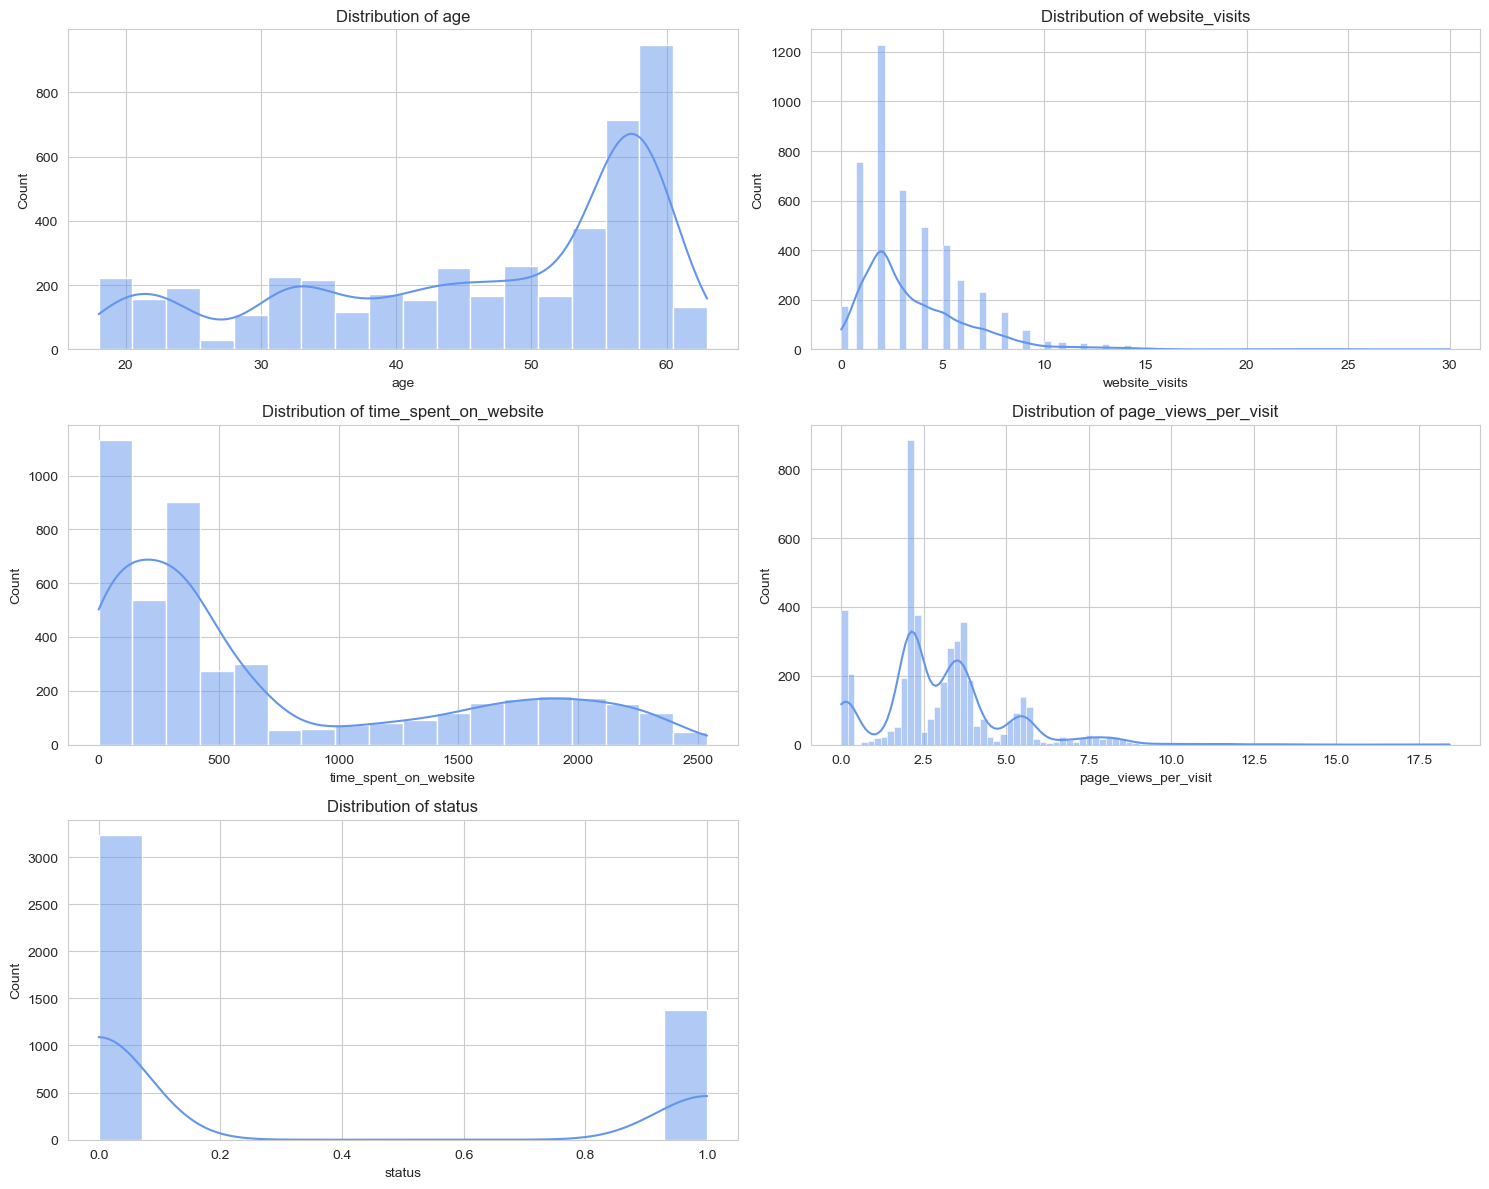

In [13]:
# Plot distribution for continous variables
plt.figure(figsize=(15,12))

# Create a subplot for each variable
for i, var in enumerate(continuous_vars):
    plt.subplot(3,2,i+1)
    sns.histplot(df[var], kde=True, color='cornflowerblue')
    plt.title(f'Distribution of {var}')

# Adjust layout to prevent overlapping    
plt.tight_layout()

# Save plots
plt.savefig('images/continuous_variables_distribution.png',  dpi=300)

# Show plots
plt.show()
    

In [14]:
# Count the custumer conversion percentage
df['status'].value_counts(normalize=True)

0    0.701431
1    0.298569
Name: status, dtype: float64

#### Summary of continuous variables distrubution:
**1. Age distribution:**
* Shows a broad distribution range with noticeable drop at 25-30 and peak in the 51-57 age group.
* This pattern suggests to focus on these age groups in marketing efforts.

**2. Web site visits:**
* Initial engagement is higher, with a notable decline in frequency after 3 visits.
* This trend indicates a need for strategies to improve user retention.

**3. Time spent on the website:**
* Fluctuating engagement with significant peaks at around 100, 370, and lesser peak at 2000 minutes.
* This suggests that while the majority of users may not spend extended periods on the website, there is a smaller segment of users who engage for longer durations.It's highlighting the potential for targeted engagement strategies.

**4. Page views per visit:**
* Notable peaks at 2.3, 3.7 and 5.5 pages, indicating the key engagement content.
* Suggests the content that is keeping people engaged. 

**5. Status distribution:**
* About 30% leads convert to customers.
* Indicates that the data is not balanced and shows the scope for improving lead conversion strategies.

In [15]:
# Define columns with categorical variables
categorical_vars = df.select_dtypes(include='object').columns

In [16]:
# Calculate number of catecorial var
len(categorical_vars)

9

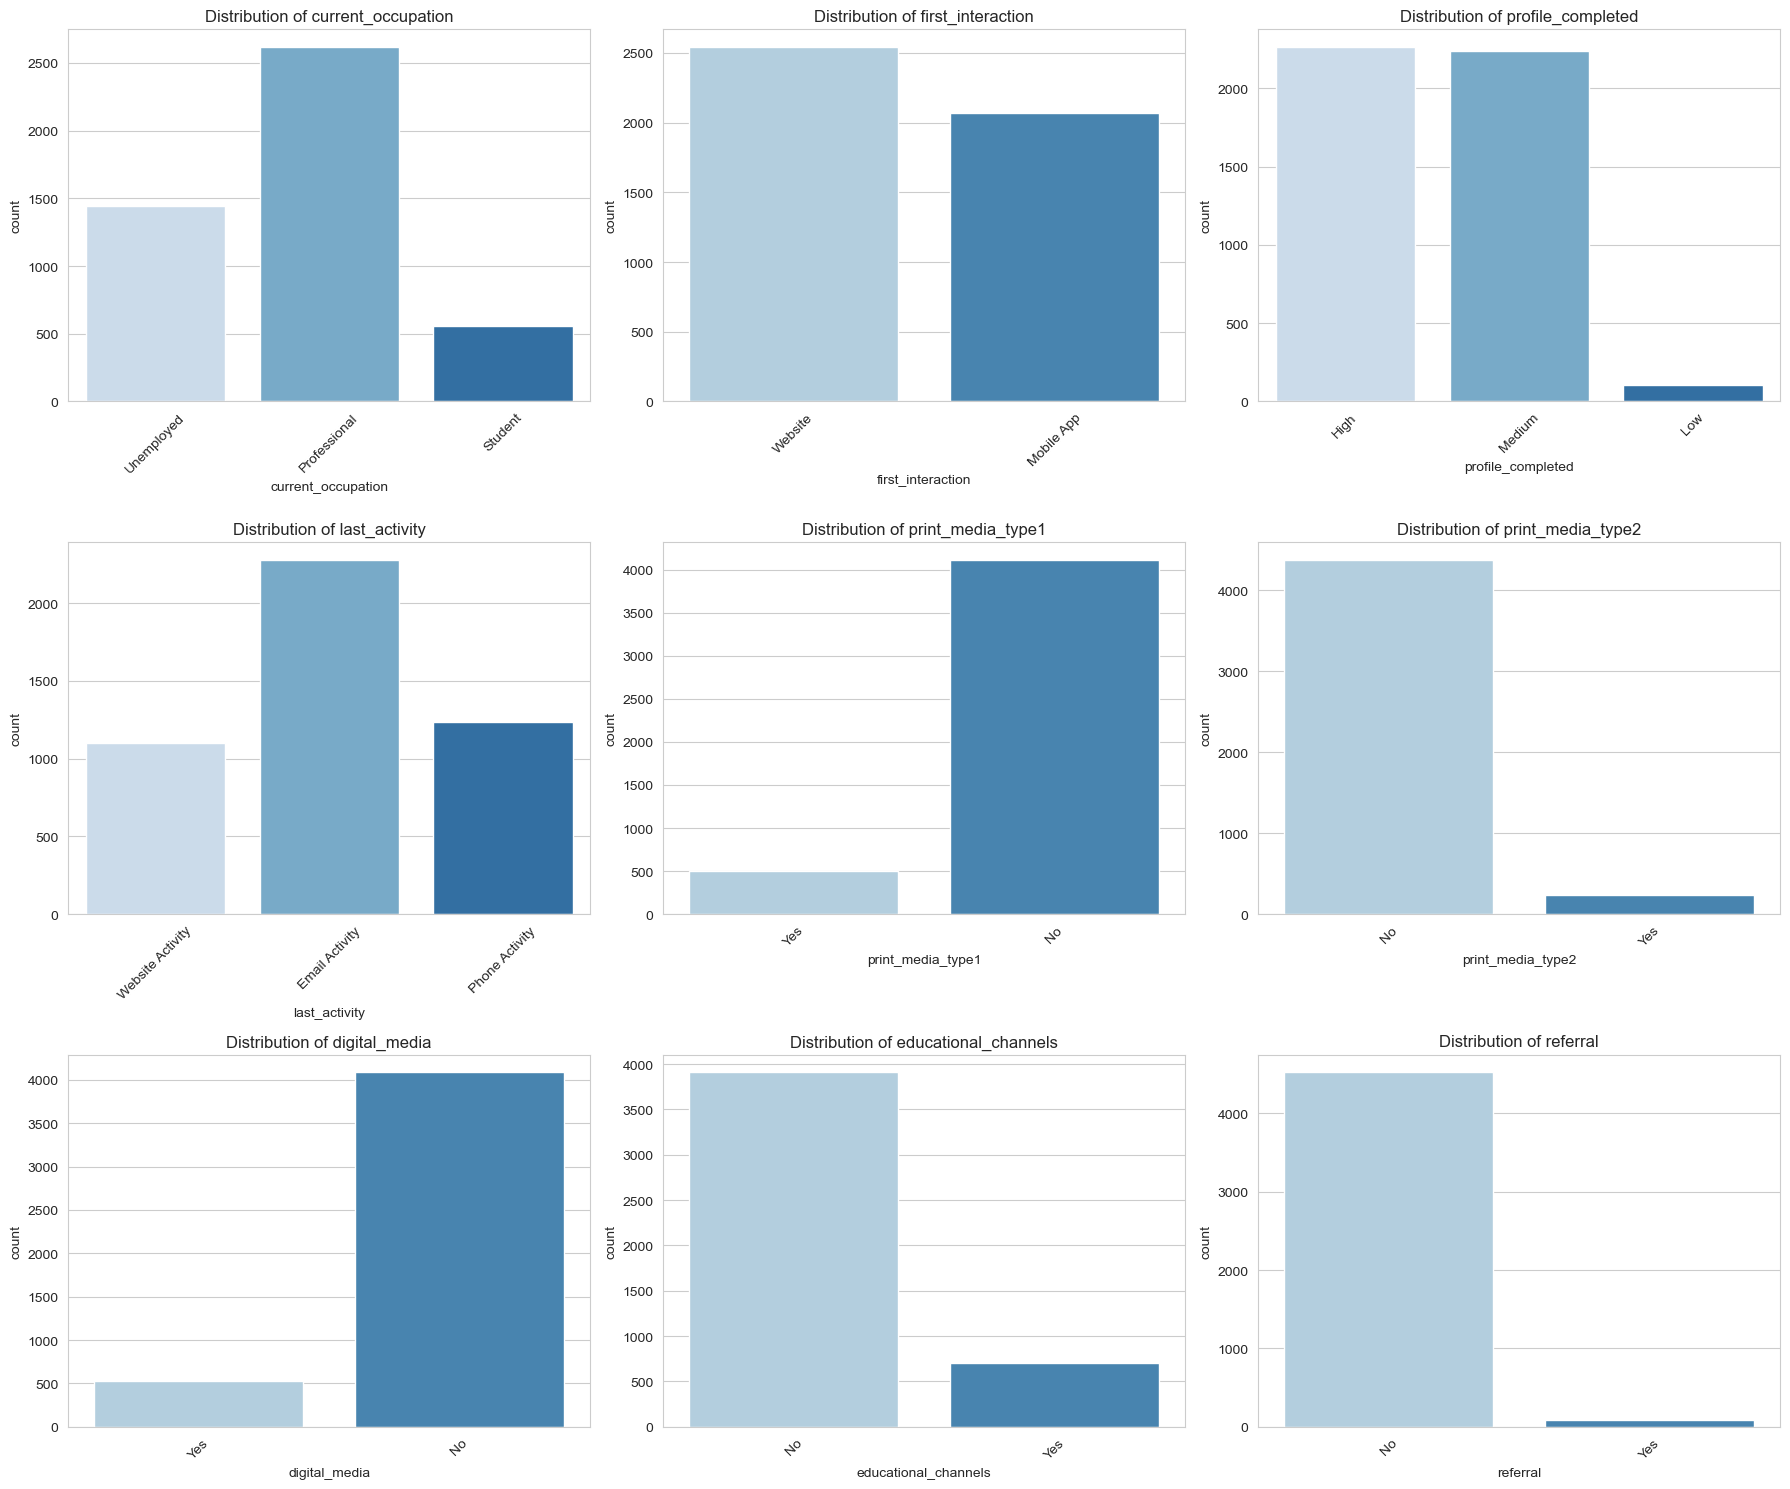

In [17]:
# Plot distribution for categorical variables
plt.figure(figsize=(18,15))

# Create a subplot for each variable
for i, var in enumerate(categorical_vars):
    plt.subplot(3,3,i +1)
    sns.countplot(data=df, x=var, palette="Blues")
    plt.title(f'Distribution of {var}')
    plt.xticks(rotation=45)
    
# Adjust layout to prevent overlapping    
plt.tight_layout()
    
# Save plots
plt.savefig('images/categorical_variables_distribution.png',  dpi=300)

# Show plots
plt.show()

#### Summary of categorical variables distribution :
**1. Current occupation:**
* Dominated by professionals, followed by unemployed, then students.
* Suggests the platform is more appealing to working professionals.

**2. First interaction:**
* Website interactions lead over mobile app engagements.
* Indicates the importance of a strong online presence and potential for the mobile app improvement.

**3. Profile completion:**
* High account completion rates surpass medium (2150 count) and low completion (100 count). 
* Implies that detailed profiles could be a significant indicator of lead quality.

**4. Last activity:**
* Email activity is most common, followed by phone and website. 
* Suggests email as a crucial engagement channel for leads.

**5. Print media Type 1:**
* Shows a lower conversion rate (500 count)compared to non-converted leads (4100 count). 
* Suggests limited effectiveness in this lead conversion.

**6. Print media Type 2:**
* Even lower conversion rate (100 count) against non-converted leads (4500 count). 
* Indicating a need for re-evaluation of this channel's effectiveness.

**7. Digital media:**
* Shows low conversion rate (500 count) versus non-conversion (4100 count).  
* Points to the potential need for digital strategy optimization.

**8. Educational channels:**
* Higher non-conversion rate (3700 count) compared to conversions (600 count). 
* Suggests opportunities for enhancing educational outreach, particularly as it shows the highest conversion rate.

**9. Referral:**
* Predominantly non-converted leads (4700 count) with minimal conversions (50 count). 
* Indicating referral programs may require enhancements to boost effectiveness.

### 3.2 Analysis of Lead Conversion ('status'):
We'll identify if certain ranges of continuous values are more associated with converted leads.

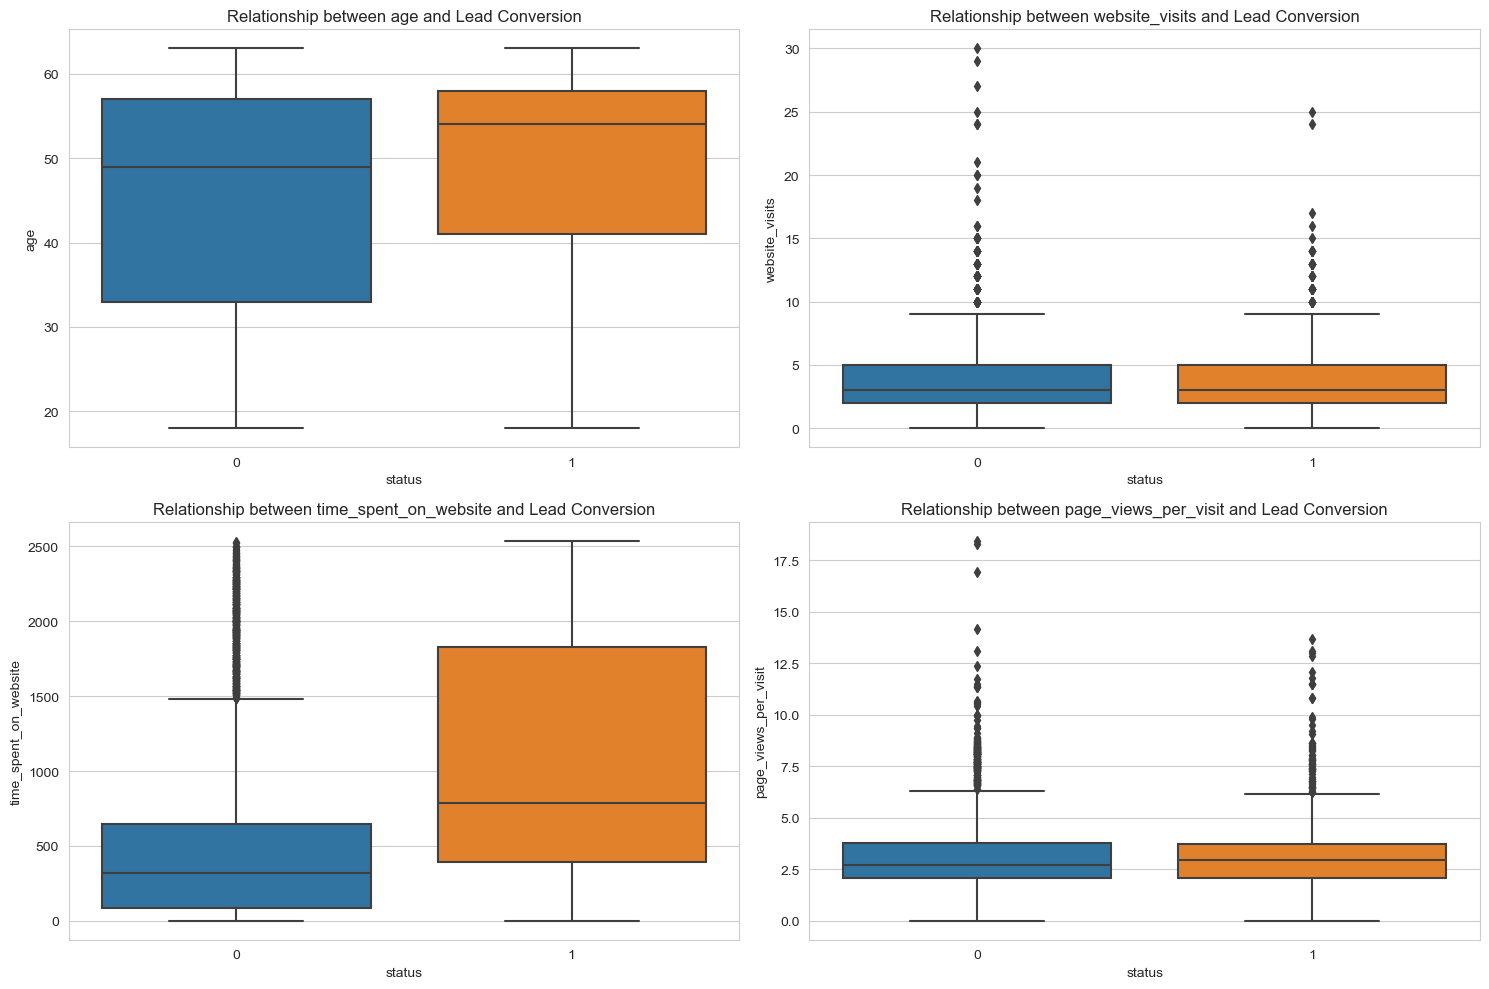

In [18]:
# Create box plots
plt.figure(figsize=(15, 10))
for i, var in enumerate(['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='status', y=var, data=df)
    plt.title(f'Relationship between {var} and Lead Conversion')
    
# Adjust layout to prevent overlapping    
plt.tight_layout()
    
# Save plots
plt.savefig('images/lead_conversion_relationships.png',  dpi=300)

# Show plots
plt.show()

#### Summary of box plot analysis for Lead conversion:
**1. Age and Conversion:**
* Non-converted leads span 18 to 57 years with a median of 48. Converted leads cluster around 42 to 57 years with higher median age (54) suggests older individuals are more likely to convert.
* Indicating older individuals are more likely to convert. No outliers -> data is well distributed.

**2. Website visits and Conversion:**
* Both converted and non-converted leads show similar patterns in website visits, mainly between 0 to 9, with a median of around 4 visits and outliers ranging from 10 to 30 visits.
* The outlier group could either represent highly engaged prospects or inefficient lead engagement. Investigating these cases might provide insights into user behavior. Treating these outliers should be done cautiously to avoid losing potential insights.

**3. Time spent on website and Conversion:**
* Not Converted: Wider distribution with significant outliers (up to 2580 minutes).
* Converted: More concentrated distribution with higher median time, but no outliers.
* Conclusion: Time spent on the website is a strong indicator of conversion. The outliers in the 'not converted' group warrant further analysis - are they anomalies or potential leads needing different engagement strategies?

**4. Page views per visit and Conversion:**
* Both groups have a similar distributions with a small increase in median for converted leads. Outliers exist in both categories (up to 18 visits for not converted, 14 for converted).
* Indicates a potential to explore content and layout strategies to increase page views per visit. The outliers might represent particularly engaged users or specific content that holds users' attention.

### 3.3 Bivariate Analysis:
We'll explore which categories have a higher likelihood of converting to paid customers.

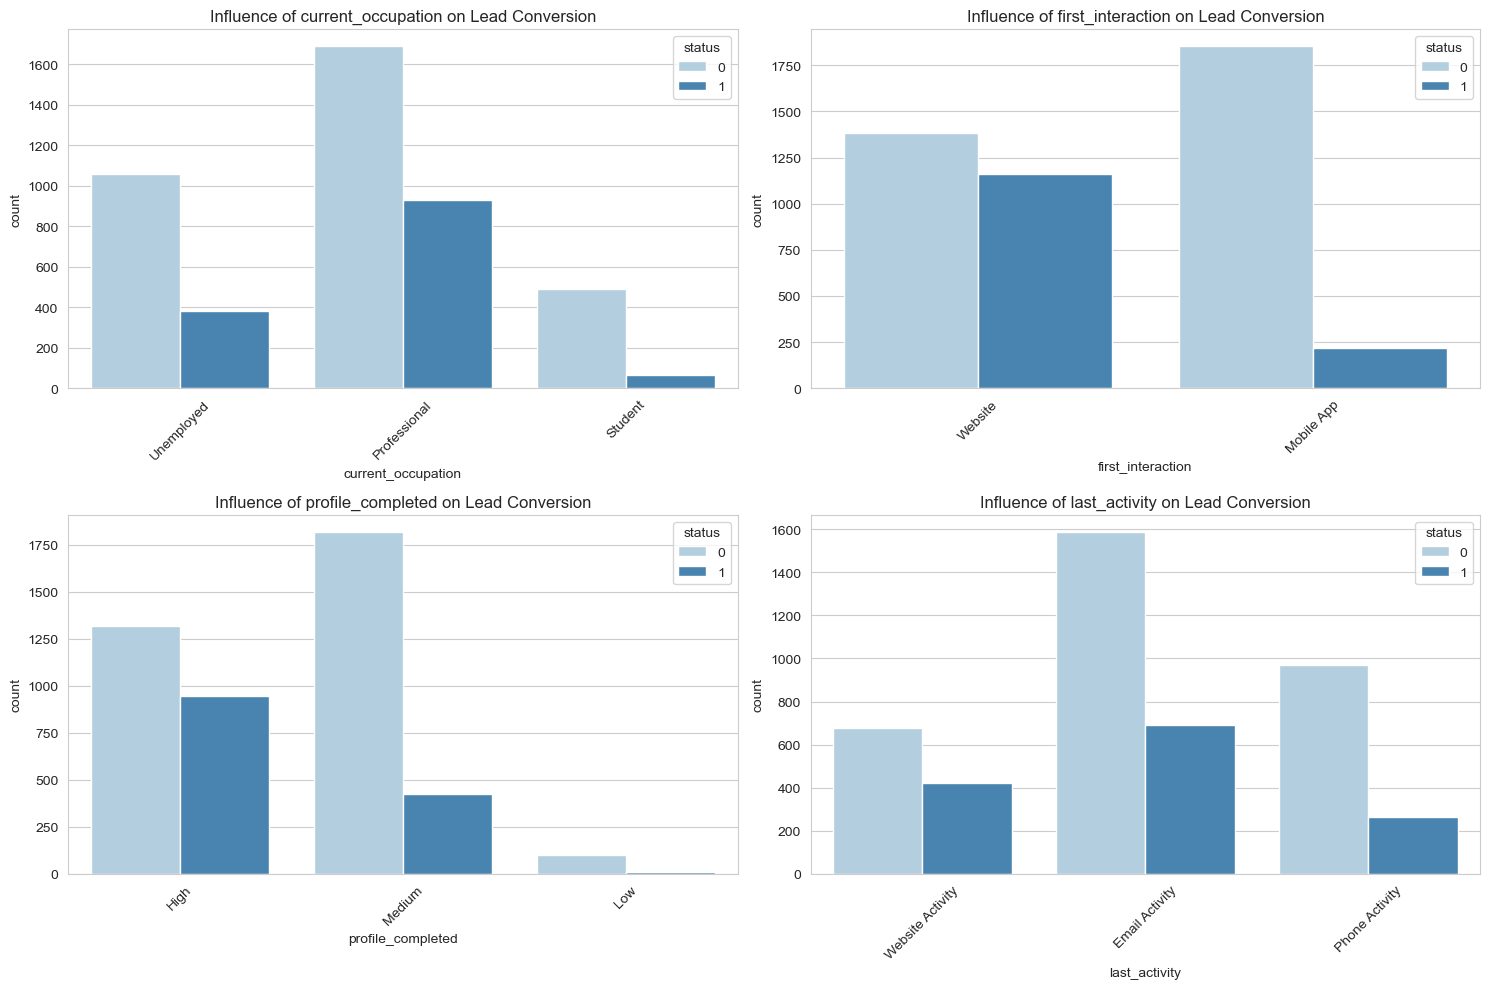

In [19]:
# Create count plots
plt.figure(figsize=(15, 10))
for i, var in enumerate(['current_occupation', 'first_interaction', 'profile_completed','last_activity']): 
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=var, hue='status', data=df, palette="Blues")
    plt.title(f'Influence of {var} on Lead Conversion')
    plt.xticks(rotation=45)

# Adjust layout to prevent overlapping    
plt.tight_layout()
    
# Save plots
plt.savefig('images/lead_conversion_influence.png',  dpi=300)

# Show plots
plt.show()

#### Summary of count plot analysis for Lead conversion:
**1. Current occupation and Conversion:**
* Professionals show the highest conversion, suggesting strategies focused on this demographic may increase overall conversions.
* Unemployed and student groups have lower conversion rates, indicating a potential to develop targeted approaches for these segments.

**2.First interaction and Conversion:**
* Website interactions lead to higher conversion rates, highlighting the importance of a robust online platform for lead engagement.
* Mobile app interactions have lower conversions, suggesting the need for app optimization to enhance user experience and conversion rates.

**3. Profile completion and Conversion:**
* High and medium profile completions correlate with higher conversions, indicating that encouraging detailed profile completion may enhance lead quality and conversion likelihood.
* Low completion rates show minimal conversions, highlighting the importance of user engagement and profile optimization.

**4. Last activity and Conversion:**
* Email activity leads in conversion rates, suggesting the effectiveness of email marketing in lead conversion.
* Website and phone activities show lesser conversions, pointing towards potential areas for strategic improvements in communication and web site engagement.

### Step 3.4 Correlation analysis

Let's conduct a correlation study to see if any continuous variables are strongly correlated with each other and with the conversion status.
We'll plot a heatmap that can be an effective visual tool for this analysis.


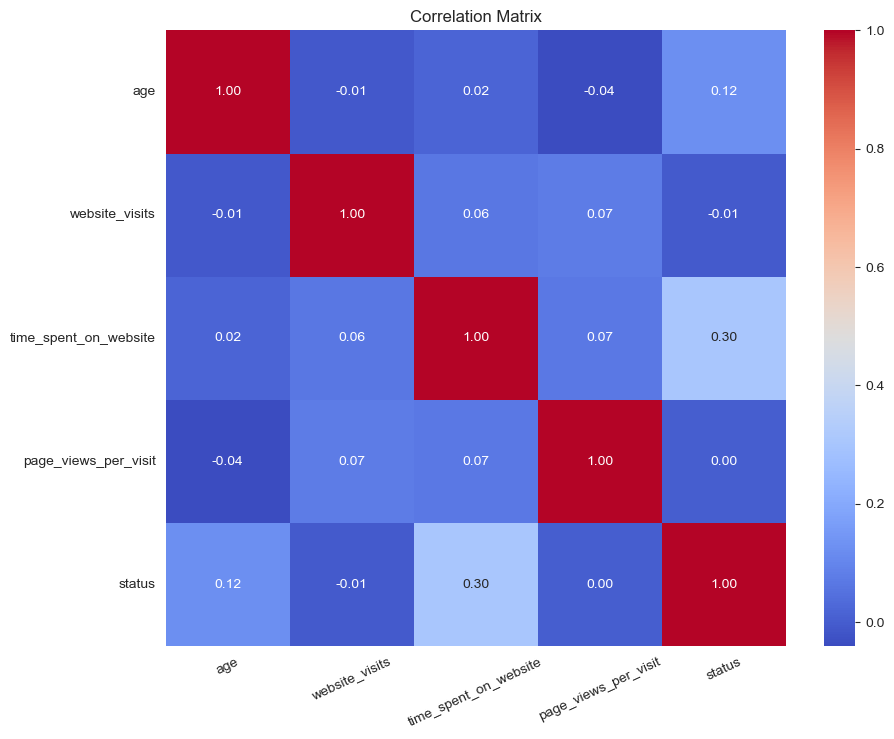

In [33]:
# Create Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.xticks(rotation=25)

# Save plot
plt.savefig('images/correlation_matrix.png',  dpi=300)
plt.show()

#### Summary of Correlation Analysis:
* Age and Lead Conversion (Status): Correlation of 0.12, indicating that targeting older age groups may improve conversion rates.
* Website Visits and Conversion (Status): Minimal correlation (-0.01), suggesting other factors more influential in conversions.
* Time Spent on Website and Conversion: Significant positive correlation (0.30), highlighting that enhancing website engagement could boost conversions.
* Page Views Per Visit and Conversion: No significant impact on conversion (Correlation: 0.00).
* Time Spent on Website and Page Views/Visits: Weak positive correlations with both page views (0.07) and website visits (0.06), indicating a marginal increase in time spent with more views and visits.
* Website Visits and Page Views Per Visit: Weakly positive correlation (0.07), slight increase in page views with more visits.
* Age and Other Variables: Age shows negligible impact on website visits and page views.

### Step 4: Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

### 4.1 Encoding categorical variables 
Categorical variables need to be converted into a numerical format. A common method is one-hot encoding, which creates a new binary column for each category in the original variable.

In [238]:
categorical_vars

Index(['current_occupation', 'first_interaction', 'profile_completed',
       'last_activity', 'print_media_type1', 'print_media_type2',
       'digital_media', 'educational_channels', 'referral'],
      dtype='object')

In [239]:
# Instantiate encoder
encoder = OneHotEncoder(sparse=False)

In [240]:
# Apply the encoder to categorical columns
encoded_data = encoder.fit_transform(df[categorical_vars])

In [241]:
encoded_data

array([[0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [242]:
# Create dataframe from encoded data
encoded_df =pd.DataFrame(encoded_data, 
                         columns=encoder.get_feature_names_out(categorical_vars))

In [243]:
encoded_df

,current_occupation_Professional,current_occupation_Student,current_occupation_Unemployed,first_interaction_Mobile App,first_interaction_Website,profile_completed_High,profile_completed_Low,profile_completed_Medium,last_activity_Email Activity,last_activity_Phone Activity,...,print_media_type1_No,print_media_type1_Yes,print_media_type2_No,print_media_type2_Yes,digital_media_No,digital_media_Yes,educational_channels_No,educational_channels_Yes,referral_No,referral_Yes
0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4608,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4609,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4610,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [244]:
# Cast encoded variables to uint8(for memory efficiency)
encoded_df = encoded_df.astype('uint8')

In [245]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   current_occupation_Professional  4612 non-null   uint8
 1   current_occupation_Student       4612 non-null   uint8
 2   current_occupation_Unemployed    4612 non-null   uint8
 3   first_interaction_Mobile App     4612 non-null   uint8
 4   first_interaction_Website        4612 non-null   uint8
 5   profile_completed_High           4612 non-null   uint8
 6   profile_completed_Low            4612 non-null   uint8
 7   profile_completed_Medium         4612 non-null   uint8
 8   last_activity_Email Activity     4612 non-null   uint8
 9   last_activity_Phone Activity     4612 non-null   uint8
 10  last_activity_Website Activity   4612 non-null   uint8
 11  print_media_type1_No             4612 non-null   uint8
 12  print_media_type1_Yes            4612 non-null  

In [246]:
# Copy DF and drop the original categorical columns from DF
# Join encoded DF to original
model_df = df.drop(categorical_vars, axis=1).copy().join(encoded_df)

In [247]:
model_df

,age,website_visits,time_spent_on_website,page_views_per_visit,status,current_occupation_Professional,current_occupation_Student,current_occupation_Unemployed,first_interaction_Mobile App,first_interaction_Website,...,print_media_type1_No,print_media_type1_Yes,print_media_type2_No,print_media_type2_Yes,digital_media_No,digital_media_Yes,educational_channels_No,educational_channels_Yes,referral_No,referral_Yes
0,57,7,1639,1.861,1,0,0,1,0,1,...,0,1,1,0,0,1,1,0,1,0
1,56,2,83,0.320,0,1,0,0,1,0,...,1,0,1,0,1,0,0,1,1,0
2,52,3,330,0.074,0,1,0,0,0,1,...,1,0,1,0,0,1,1,0,1,0
3,53,4,464,2.057,1,0,0,1,0,1,...,1,0,1,0,1,0,1,0,1,0
4,23,4,600,16.914,0,0,1,0,0,1,...,1,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,35,15,360,2.170,0,0,0,1,1,0,...,1,0,1,0,1,0,0,1,1,0
4608,55,8,2327,5.393,0,1,0,0,1,0,...,1,0,1,0,1,0,1,0,1,0
4609,58,2,212,2.692,1,1,0,0,0,1,...,1,0,1,0,1,0,1,0,1,0
4610,57,1,154,3.879,0,1,0,0,1,0,...,0,1,1,0,1,0,1,0,1,0


In [248]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              4612 non-null   int64  
 1   website_visits                   4612 non-null   int64  
 2   time_spent_on_website            4612 non-null   int64  
 3   page_views_per_visit             4612 non-null   float64
 4   status                           4612 non-null   int64  
 5   current_occupation_Professional  4612 non-null   uint8  
 6   current_occupation_Student       4612 non-null   uint8  
 7   current_occupation_Unemployed    4612 non-null   uint8  
 8   first_interaction_Mobile App     4612 non-null   uint8  
 9   first_interaction_Website        4612 non-null   uint8  
 10  profile_completed_High           4612 non-null   uint8  
 11  profile_completed_Low            4612 non-null   uint8  
 12  profile_completed_Me

### 4.2 Outlier Analysis:
Treating outliers in dataset is a crucial step to ensure the robustness and accuracy of a model. Let's explore it.

#### Exploration:
- Setting thresholds: The upper limits for outliers are set based on the box plots. These thresholds are crucial and should be chosen carefully. We can potentialy experiment with them.
- Capping outliers: The *clip* method caps values at the specific thresholds. This prevents extreme values from skewing the analysis while retaining the overall distribution.
- Investigating high engagement of  non-converted leads: Deep dive into the segment of leads that have high engagement but did not convert. This analysis can provide valuable insights.

#### Outlier Treatment Approach
**Websitevisits:** 

Insight: Outliers between 10 to 30 visits. \
Threshold: Suggested cap between 20-25 visits to include lower outliers and exclude extremes.\
Reason: Balances engagement and data integrity, avoiding extreme values.

**Time spent on website:**

Insight: Outliers reach up to 2580 minutes. \
Threshold: Suggested cap at 2000 minutes to include most genuine engagements.\
Reason: A conservative approach that retains valuable data while excluding extreme outliers.

**Page views per visit:**

Insight: Outliers up to 18 (non-converted) and 14 (converted). \
Threshold: Suggested cap around 15-16 views to cover most outlier ranges.\
Reason: Captures high engagement levels without including atypical data.

In [249]:
# Setting thresholds based on box plots (can be adjusted for further analysis)
website_visits_upper_threshold = 20 
time_spent_upper_threshold = 2000    
page_views_upper_threshold = 15      

# Capping the outliers
model_df['website_visits'] = model_df['website_visits'].clip(upper=website_visits_upper_threshold)
model_df['time_spent_on_website'] = model_df['time_spent_on_website'].clip(upper=time_spent_upper_threshold)
model_df['page_views_per_visit'] = model_df['page_views_per_visit'].clip(upper=page_views_upper_threshold)

# Investigate'not converted' leads with high time spent
# Analyze the data subset where time spent is exceptionally high
high_engagement_not_converted = model_df[(model_df['time_spent_on_website'] > time_spent_upper_threshold) & 
                                         (model_df['status'] == 0)]
print("Analysis of Not Converted Leads with High Time Spent:")
print(high_engagement_not_converted.describe())

Analysis of Not Converted Leads with High Time Spent:
       age  website_visits  time_spent_on_website  page_views_per_visit  \
count  0.0             0.0                    0.0                   0.0   
mean   NaN             NaN                    NaN                   NaN   
std    NaN             NaN                    NaN                   NaN   
min    NaN             NaN                    NaN                   NaN   
25%    NaN             NaN                    NaN                   NaN   
50%    NaN             NaN                    NaN                   NaN   
75%    NaN             NaN                    NaN                   NaN   
max    NaN             NaN                    NaN                   NaN   

       status  current_occupation_Professional  current_occupation_Student  \
count     0.0                              0.0                         0.0   
mean      NaN                              NaN                         NaN   
std       NaN                       

#### Conclusion:
- The approach effectively removed extreme outliers without losing valuable insights, particularly for 'time spent on website'.
- No entries found for high time spent but not converted post capping indicates a strong correlation between high engagement and conversion. We can potentially experiment with the cap to find out if that will have effect the model. 

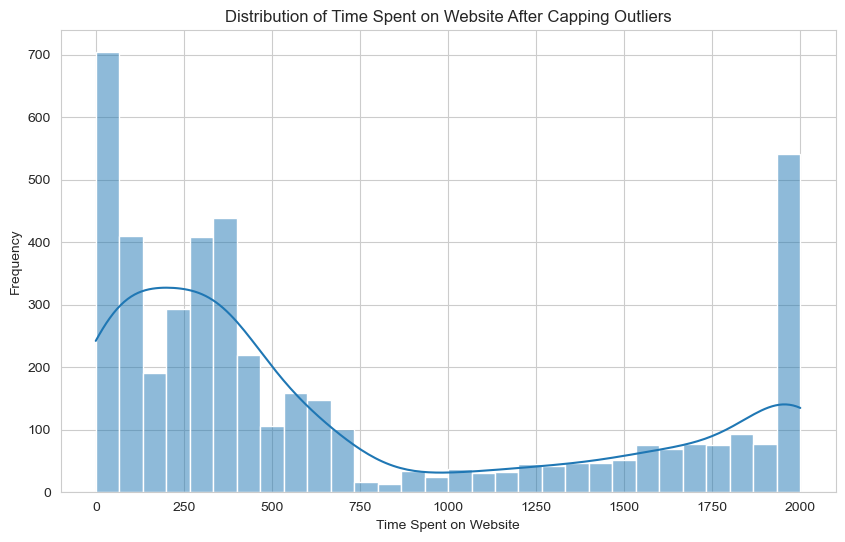

In [250]:
# Plotting histogram for 'time_spent_on_website' as an example
plt.figure(figsize=(10, 6))
sns.histplot(data=model_df, x='time_spent_on_website', bins=30, kde=True)
plt.title('Distribution of Time Spent on Website After Capping Outliers')
plt.xlabel('Time Spent on Website')
plt.ylabel('Frequency')
plt.show()

In [251]:
model_df.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status,current_occupation_Professional,current_occupation_Student,current_occupation_Unemployed,first_interaction_Mobile App,first_interaction_Website,...,print_media_type1_No,print_media_type1_Yes,print_media_type2_No,print_media_type2_Yes,digital_media_No,digital_media_Yes,educational_channels_No,educational_channels_Yes,referral_No,referral_Yes
count,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,...,4612.000000,4612.000000,4612.00000,4612.00000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000
mean,46.201214,3.556158,703.274068,3.024250,0.298569,0.567216,0.120338,0.312446,0.448829,0.551171,...,0.892238,0.107762,0.94948,0.05052,0.885733,0.114267,0.847138,0.152862,0.979835,0.020165
std,13.161454,2.753774,702.720209,1.955216,0.457680,0.495515,0.325392,0.463541,0.497429,0.497429,...,0.310114,0.310114,0.21904,0.21904,0.318170,0.318170,0.359894,0.359894,0.140579,0.140579
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,2.000000,148.750000,2.077750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.00000,0.00000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,51.000000,3.000000,376.000000,2.792000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,1.00000,0.00000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,57.000000,5.000000,1336.750000,3.756250,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,1.00000,0.00000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,63.000000,20.000000,2000.000000,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Conclusion:
Outlier treatment was successful, enhancing the data suitability for robust modeling while maintaining its essential characteristics.

### 4.3 Perform multicollinearity check:
Multicollinearity occurs when two or variables that used to forecast in a regression model are highly correlated. We'll use the Variance Inflation Factor (VIF) as a metric. VIF measures how much the variance of an estimated regression coefficient increases if our features are correlated.
We'll calculates the VIF for each feature in your DataFrame, excluding the target variable. After running this code, you'll need to review the VIF values:

Low VIF (1-5): Indicates low correlation.\
Moderate VIF (5-10): Suggests moderate correlation that may or may not require action.\
High VIF (>10): Signals high multicollinearity that needs to be addressed.

In [253]:
# Add a constant to the DF
model_df_vif = add_constant(model_df)

# Create a new DF for VIF results
vif_data = pd.DataFrame()
vif_data["Feature"] = model_df_vif.columns


# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(model_df_vif.values, i) for i in range(model_df_vif.shape[1])]

# Display the VIF results
print("Initial VIF results:")
vif_data

Initial VIF results:


,Feature,VIF
0,const,0.000000
1,age,1.996642
2,website_visits,1.014058
3,time_spent_on_website,1.151261
4,page_views_per_visit,1.016164
5,status,1.542576
6,current_occupation_Professional,inf
7,current_occupation_Student,inf
8,current_occupation_Unemployed,inf
9,first_interaction_Mobile App,inf


##### Observation:
The infinite VIF values for one-hot encoded categorical variables have perfect multicollinearity, common for one-hot encoding. To address it we'll remove one dummy variable from each group of one hot encoded variables to avoid perfect multicollinearity(inf).

In [254]:
# List of original categorical variables
original_cat_vars = ['current_occupation', 'first_interaction', 'profile_completed',
                             'last_activity', 'print_media_type1', 'print_media_type2',
                             'digital_media', 'educational_channels', 'referral']

# Drop one dummy variable from each set of dummies
# Get list of columns for each categorical variable
for var in original_cat_vars:
    dummy_vars = [col for col in model_df.columns if var in col]

    # Drop the first dummy variable in each set
    if dummy_vars:
        model_df.drop(dummy_vars[0], axis=1, inplace=True)

# Recompute VIF
new_model_df_vif = sm.add_constant(model_df)
new_vif_data = pd.DataFrame()
new_vif_data["Feature"] = new_model_df_vif.columns
new_vif_data["VIF"] = [variance_inflation_factor(new_model_df_vif.values, i)
                   for i in range(new_model_df_vif.shape[1])]

# Display updated VIF results
print("Updated VIF results:")
new_vif_data

Updated VIF results:


,Feature,VIF
0,const,38.448987
1,age,1.996642
2,website_visits,1.014058
3,time_spent_on_website,1.151261
4,page_views_per_visit,1.016164
5,status,1.542576
6,current_occupation_Student,2.078372
7,current_occupation_Unemployed,1.083285
8,first_interaction_Website,1.227509
9,profile_completed_Low,1.047489


In [255]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4612 non-null   int64  
 1   website_visits                  4612 non-null   int64  
 2   time_spent_on_website           4612 non-null   int64  
 3   page_views_per_visit            4612 non-null   float64
 4   status                          4612 non-null   int64  
 5   current_occupation_Student      4612 non-null   uint8  
 6   current_occupation_Unemployed   4612 non-null   uint8  
 7   first_interaction_Website       4612 non-null   uint8  
 8   profile_completed_Low           4612 non-null   uint8  
 9   profile_completed_Medium        4612 non-null   uint8  
 10  last_activity_Phone Activity    4612 non-null   uint8  
 11  last_activity_Website Activity  4612 non-null   uint8  
 12  print_media_type1_Yes           46

- Dummy variables have been successfully dropped.

### 4.4 Features scaling:
Scaling is essential for for our Logistic regression base model. It ensures that all features contribute equally.


In [258]:
# Define features to scale
feature_columns = ['age', 'website_visits', 'time_spent_on_website', 'page_views_per_visit']

# Instantiate and apply the scaler
scaler = StandardScaler()

# Copy model_df for scaled data, apply scaler 
scaled_model_df = model_df.copy()
scaled_model_df[feature_columns] = scaler.fit_transform(scaled_model_df[feature_columns])

#Display scaling
scaled_model_df

,age,website_visits,time_spent_on_website,page_views_per_visit,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
0,0.820575,1.250726,1.331721,-0.595012,1,0,1,1,0,0,0,1,1,0,1,0,0
1,0.744587,-0.565161,-0.882771,-1.383245,0,0,0,0,0,1,0,1,0,0,0,1,0
2,0.440636,-0.201984,-0.531242,-1.509076,0,0,0,1,0,1,0,1,0,0,1,0,0
3,0.516624,0.161193,-0.340534,-0.494756,1,0,1,1,0,0,0,1,0,0,0,0,0
4,-1.763007,0.161193,-0.146979,6.125690,0,1,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4607,-0.851154,4.156145,-0.488546,-0.436956,0,0,1,0,0,1,1,0,0,0,0,1,0
4608,0.668599,1.613903,1.845495,1.211634,0,0,0,0,0,1,0,0,0,0,0,0,0
4609,0.896562,-0.565161,-0.699179,-0.169948,1,0,0,1,0,0,0,0,0,0,0,0,0
4610,0.820575,-0.928339,-0.781725,0.437211,0,0,0,0,0,1,0,1,1,0,0,0,0


In [259]:
scaled_model_df.describe()

,age,website_visits,time_spent_on_website,page_views_per_visit,status,current_occupation_Student,current_occupation_Unemployed,first_interaction_Website,profile_completed_Low,profile_completed_Medium,last_activity_Phone Activity,last_activity_Website Activity,print_media_type1_Yes,print_media_type2_Yes,digital_media_Yes,educational_channels_Yes,referral_Yes
count,4.612000e+03,4.612000e+03,4.612000e+03,4.612000e+03,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.000000,4612.00000,4612.000000,4612.000000,4612.000000
mean,1.582284e-16,-9.502794e-16,3.384591e-17,5.522228e-17,0.298569,0.120338,0.312446,0.551171,0.023200,0.485906,0.267563,0.238508,0.107762,0.05052,0.114267,0.152862,0.020165
std,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,0.457680,0.325392,0.463541,0.497429,0.150556,0.499856,0.442736,0.426218,0.310114,0.21904,0.318170,0.359894,0.140579
min,-2.142945e+00,-1.291516e+00,-1.000897e+00,-1.546928e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,-7.751667e-01,-5.651614e-01,-7.891963e-01,-4.841422e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,3.646486e-01,-2.019840e-01,-4.657751e-01,-1.187977e-01,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,8.205747e-01,5.243709e-01,9.015603e-01,3.744238e-01,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,1.276501e+00,5.972032e+00,1.845495e+00,6.125690e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000


#### Conclusion:

The scaling process was effectively applied to the features, making them suitable for the next modeling steps.

### Step 5. Model's objective
Let's conclude what is our model's main objectives.

1. **Predictive modeling:**
- The core objective is to develop a model that accurately predicts leads that are most likely to convert into paid customers. This prediction aids in efficient resource allocation and targeted marketing strategies.

2. **Key factor identification:**
- Identify critical factors that influence the likelihood of lead conversion. Understanding these factors will allow more focused marketing approach and better lead management.

3. **Lead profiling:**
- Create detailed profiles for leads that have a high probability of conversion. This profiling helps in tailoring communication and identifies prospects interests
#### Evaluation metrics:
- **Precision:** Vital to ensure that the model accurately identifies leads that are truly likely to convert, minimizing wasted resources on false positives.\
- **Recall:** Important to capture as many potential conversions as possible, reducing the risk of missing out on valuable leads.\
- **F1 Score:** Balances precision and recall, especially useful in situations where both false positives and false negatives have significant implications.\
- **AUC-ROC:** Measures the model's ability to distinguish between convertible and non-convertible leads, crucial for evaluating the overall effectiveness of the model.


In [351]:
# Split Features and target var
X = scaled_model_df.drop('status', axis=1)
y = scaled_model_df['status']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


### 5.1 Model's sensitivity to imbalance:


In [357]:
class_distribution = y_train.value_counts(normalize=True)
print("Class distribution in training set:\n", class_distribution)

Class distribution in training set:
 0    0.701363
1    0.298637
Name: status, dtype: float64


#### Conclusion:
- With a class imbalance like this, there's a risk the model might be biased towards predicting non conversions more accurately than conversions. 
- To address it we'll inplement Synthetic Minority Over-sampling Technique (SMOTE). It's oversampling technique that generates synthetic samples for the minority class(converted leads).

In [359]:
# Instantiate SMOTE
smote = SMOTE(random_state=1)

# Apply it to training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

#### 5.2 Logistic Regression basemodel

In [360]:
# Instantiate and fit model with the training data
logreg = LogisticRegression(random_state=1)
logreg.fit(X_train_smote, y_train_smote)

LogisticRegression(random_state=1)

In [362]:
# Evaluate training model
y_train_pred = logreg.predict(X_train)
print("Training Set Evaluation:")
print("Classification Report:\n", classification_report(y_train, y_train_pred))
print("Accuracy Score:", accuracy_score(y_train, y_train_pred))

Training Set Evaluation:
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.80      0.85      2264
           1       0.63      0.78      0.70       964

    accuracy                           0.80      3228
   macro avg       0.76      0.79      0.77      3228
weighted avg       0.82      0.80      0.80      3228

Accuracy Score: 0.7973977695167286


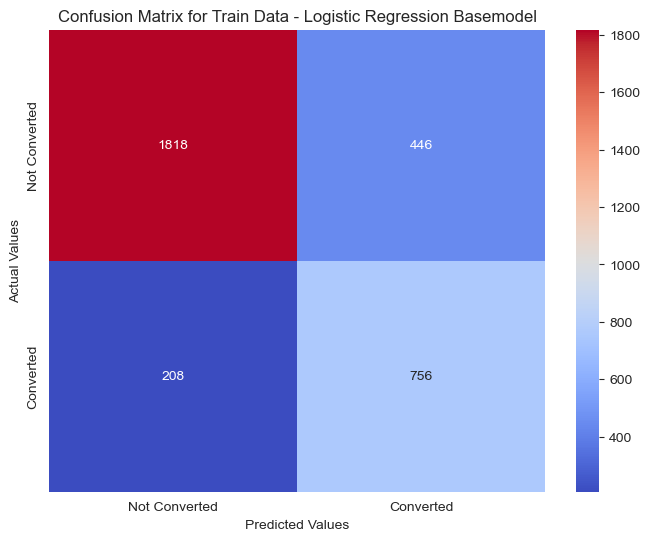

In [365]:
# Compute and plot confusion matrix for train set
cm_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt="d", cmap='coolwarm', xticklabels=['Not Converted', 'Converted'],
            yticklabels=['Not Converted', 'Converted'])
plt.title('Confusion Matrix for Train Data - Logistic Regression Basemodel')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')

# Save plot
plt.savefig('images/conf_matrix_train_log_reg_base.png',  dpi=300)
plt.show()

In [366]:
# Evaluate on test data
y_test_pred = logreg.predict(X_test)
print("Test Set Evaluation:")
print("Classification Report:\n", classification_report(y_test, y_test_pred))
print("Accuracy Score:", accuracy_score(y_test, y_test_pred))

Test Set Evaluation:
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.81      0.85       971
           1       0.64      0.78      0.70       413

    accuracy                           0.80      1384
   macro avg       0.77      0.80      0.78      1384
weighted avg       0.82      0.80      0.81      1384

Accuracy Score: 0.8027456647398844


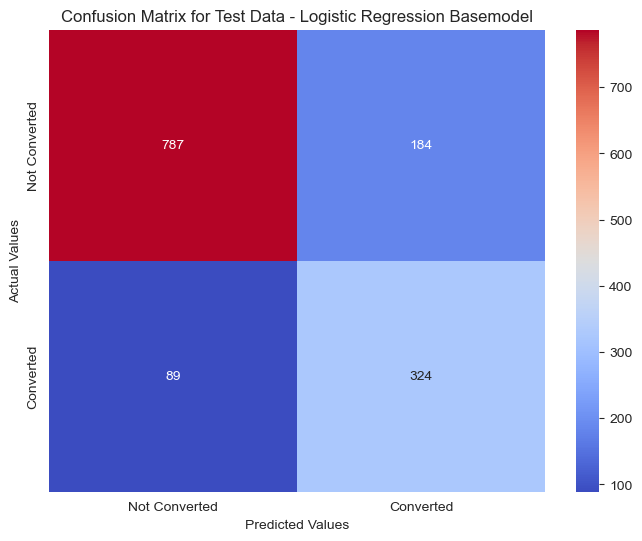

<Figure size 640x480 with 0 Axes>

In [367]:
# Compute Plot confusion matrix for test set
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap='coolwarm', xticklabels=['Not Converted', 'Converted'],
            yticklabels=['Not Converted', 'Converted'])
plt.title('Confusion Matrix for Test Data - Logistic Regression Basemodel')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

# Save plot
plt.savefig('images/conf_matrix_test_log_reg_base.png',  dpi=300)
plt.show()

In [371]:
# Create the directory if doesn't exist
if not os.path.exists('saved_models'):
    os.makedirs('saved_models')
    
# Save the model
dump(logreg, 'saved_models/logistic_regression_model.joblib')

['saved_models/logistic_regression_model.joblib']

#### Model performance conclusion:
- **Accuracy:** The logistic regression basemodel has an accuracy of ~ 80% on both training and test sets, indicating reliable generalization to unseen data.
- **High precision:**(90%) in predicting non-conversions (Class 0) suggests the model effectively identifies true negatives.
- **Precision:**: for conversions (Class 1) is moderate at 64%. This indicates room for improvement in reducing false positives in predicting conversions.
- **Recall:** The model has a balanced recall for both classes, with 80% for non-conversions and 78% for conversions, effectively identifying most of the actual class instances.
- **F1-Score:** The model shows a good balance between precision and recall for non-conversions 85% and a lower balance for conversions 70%.
#### Summary: 
The base model demonstrates a solid foundation in predicting lead conversions, with strengths in identifying non-conversions. Further refinement is advised to enhance precision in predicting actual conversions, which is critical for effectively allocating resources in lead conversion strategies.

#### Step 6 : Decision Tree Model Base Model
Let'sexplore Decision Tree algorithm. Decision Trees offer high interpretability, making them ideal for our project's goal of understanding lead conversion drivers.

#### Key Considerations:
- **Scaling:** Decision Trees do not require scaled data, unlike Logistic Regression. They work efficiently with the original data range, as their splits are based on feature values but not on scale. Therefore, for the Decision Tree model, we will use the unscaled data.
- **SMOTE and Decision Trees:** We used SMOTE for addressing class imbalance in Logistic Regression. Decision Trees can handle imbalanced data better than logistic regression due to their hierarchical structure.

Our next step is to build and evaluate a Decision Tree model, comparing its performance with the Logistic Regression model to identify the best approach for our project's objectives.


In [394]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4612 entries, 0 to 4611
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             4612 non-null   int64  
 1   website_visits                  4612 non-null   int64  
 2   time_spent_on_website           4612 non-null   int64  
 3   page_views_per_visit            4612 non-null   float64
 4   status                          4612 non-null   int64  
 5   current_occupation_Student      4612 non-null   uint8  
 6   current_occupation_Unemployed   4612 non-null   uint8  
 7   first_interaction_Website       4612 non-null   uint8  
 8   profile_completed_Low           4612 non-null   uint8  
 9   profile_completed_Medium        4612 non-null   uint8  
 10  last_activity_Phone Activity    4612 non-null   uint8  
 11  last_activity_Website Activity  4612 non-null   uint8  
 12  print_media_type1_Yes           46

In [411]:
# Split Features and target var
X = model_df.drop('status', axis=1)
y = model_df['status']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [412]:
# Instantiate the Decision Tree Classifier
dtree = DecisionTreeClassifier(random_state=1)


In [413]:
# Fit the model with the training data
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [414]:
# Predict on the training set
y_train_pred_dtree = dtree.predict(X_train)

In [415]:
# Evaluate training model
print("Training Set Evaluation:")
print("Classification Report:\n", classification_report(y_train, y_train_pred_dtree))
print("Accuracy Score:", accuracy_score(y_train, y_train_pred_dtree))


Training Set Evaluation:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228

Accuracy Score: 0.9993804213135068


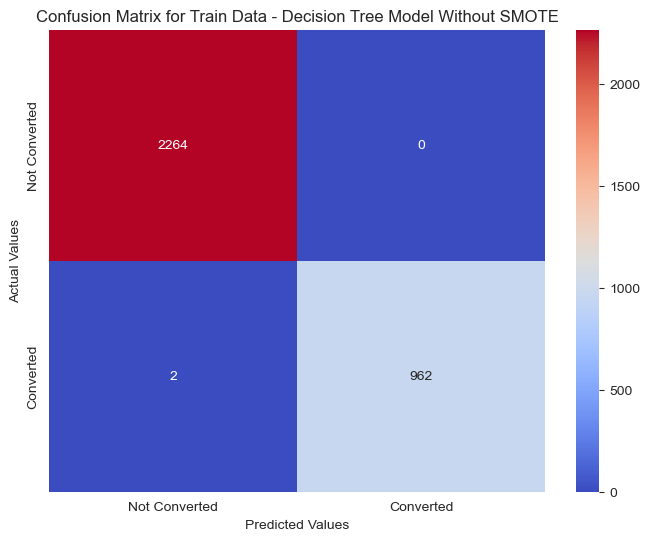

In [416]:
# Plot confusion matrix for train set
cm_train_dtree = confusion_matrix(y_train, y_train_pred_dtree)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train_dtree, annot=True, fmt="d", cmap='coolwarm', 
            xticklabels=['Not Converted', 'Converted'],
            yticklabels=['Not Converted', 'Converted'])
plt.title('Confusion Matrix for Train Data - Decision Tree Model Without SMOTE')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.savefig('images/conf_matrix_train_dec_tree_noSMOTE.png',  dpi=300)
plt.show()


In [417]:
# Predict on the test set
y_test_pred_dtree = dtree.predict(X_test)



In [418]:
# Evaluate on test data
print("Test Set Evaluation:")
print("Classification Report:\n", classification_report(y_test, y_test_pred_dtree))
print("Accuracy Score:", accuracy_score(y_test, y_test_pred_dtree))



Test Set Evaluation:
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       971
           1       0.67      0.67      0.67       413

    accuracy                           0.80      1384
   macro avg       0.76      0.76      0.76      1384
weighted avg       0.80      0.80      0.80      1384

Accuracy Score: 0.8013005780346821


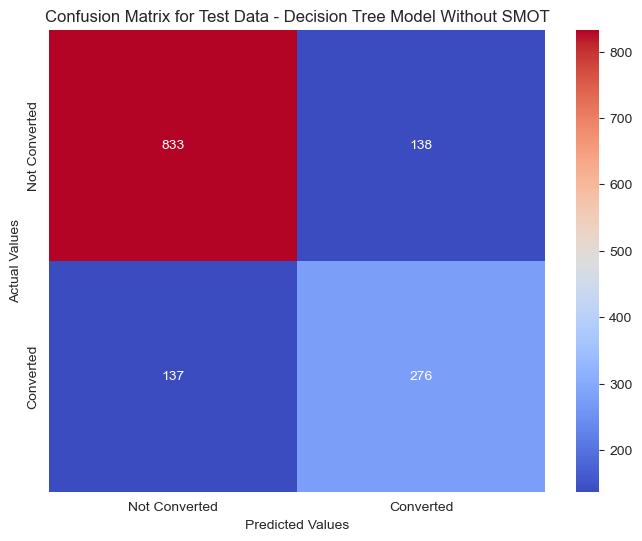

In [419]:
# Compute and plot confusion matrix for test set
cm_test_dtree = confusion_matrix(y_test, y_test_pred_dtree)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_dtree, annot=True, fmt="d", cmap='coolwarm', 
            xticklabels=['Not Converted', 'Converted'],
            yticklabels=['Not Converted', 'Converted'])
plt.title('Confusion Matrix for Test Data - Decision Tree Model Without SMOT')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.savefig('images/conf_matrix_test_dec_tree_noSMOTE.png',  dpi=300)
plt.show()


In [420]:
# Save the Decision Tree model
dump(dtree, 'saved_models/dec_tree_noSMOTE.joblib')

['saved_models/dec_tree_noSMOTE.joblib']

### Summary:
The Decision Tree model shows perfect training results but similar accuracy to the Logistic Regression model on test data, suggesting overfitting. It suggests further tuning or exploring other models to achieve a balanced performance.

### Step 7.1: Random Forest Without SMOTE
We're moving from a single Decision Tree to Random Forest, a more robust model that leverages Random ensemble approach to enhance our model.

- **Do we need to prune Decision Tree ?:** Random Forest naturally handles complexities of individual trees, reducing the risk of overfitting. Pruning each tree isn't necessary.

**Advantages of Random Forest:** \
- **Strength in Numbers:** Combines many trees to improve accuracy and reduce overfitting.
- **Complexity Management:** Better handles complex data for more accurate predictions.
- **Simplicity and Effectiveness:** Directly applying Random Forest simplifies our process without losing quality.

In [423]:
# Instantiate Random Forest Classifier
rfc = RandomForestClassifier(random_state=1)


In [424]:
# Fit model with the regular training data (without SMOTE)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [425]:
# Predict on the training set
y_train_pred_rfc = rfc.predict(X_train)


In [426]:
# Evaluate training model
print("Training Set Evaluation:")
print("Classification Report:\n", classification_report(y_train, y_train_pred_rfc))
print("Accuracy Score:", accuracy_score(y_train, y_train_pred_rfc))

Training Set Evaluation:
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228

Accuracy Score: 0.9993804213135068


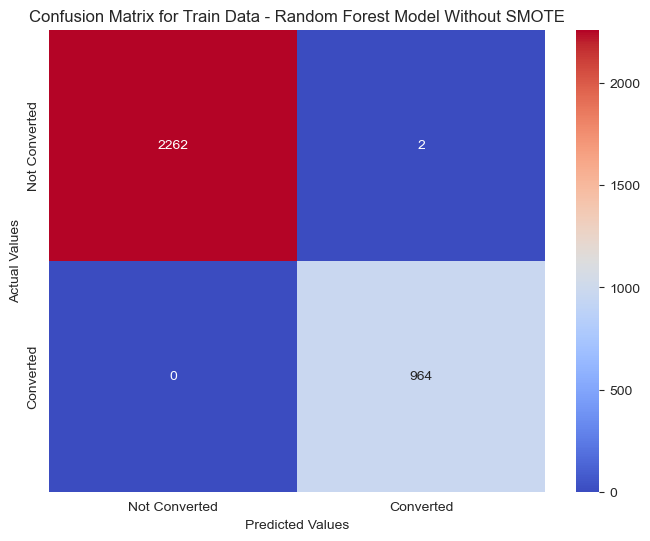

In [427]:
# Compute and plot confusion matrix for train set
cm_train_rfc = confusion_matrix(y_train, y_train_pred_rfc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train_rfc, annot=True, fmt="d", cmap='coolwarm', 
            xticklabels=['Not Converted', 'Converted'],
            yticklabels=['Not Converted', 'Converted'])
plt.title('Confusion Matrix for Train Data - Random Forest Model Without SMOTE')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.savefig('images/conf_matrix_train_dec_tree_noSMOTE.png',  dpi=300)
plt.show()


In [428]:
# Predict on the test set
y_test_pred_rfc = rfc.predict(X_test)

In [430]:
# Evaluate on test data
print("Test Set Evaluation:")
print("Classification Report:\n", classification_report(y_test, y_test_pred_rfc))
print("Accuracy Score:", accuracy_score(y_test, y_test_pred_rfc))

Test Set Evaluation:
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       971
           1       0.77      0.72      0.75       413

    accuracy                           0.85      1384
   macro avg       0.83      0.82      0.82      1384
weighted avg       0.85      0.85      0.85      1384

Accuracy Score: 0.8540462427745664


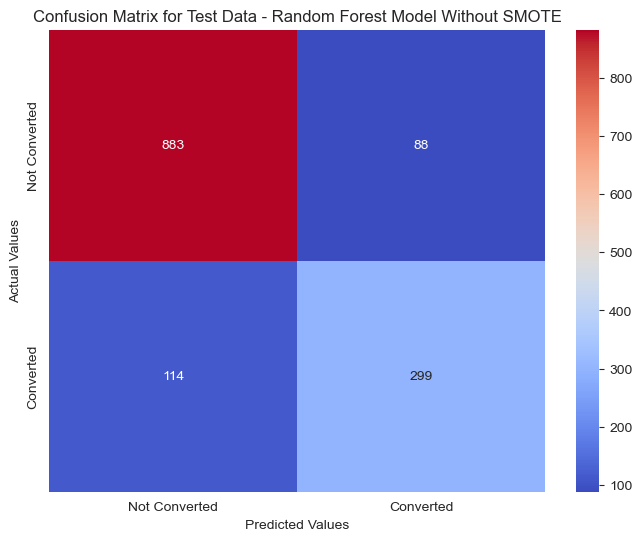

In [431]:
# Compute and plot confusion matrix for test set
cm_test_rfc = confusion_matrix(y_test, y_test_pred_rfc)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_rfc, annot=True, fmt="d", cmap='coolwarm', 
            xticklabels=['Not Converted', 'Converted'],
            yticklabels=['Not Converted', 'Converted'])
plt.title('Confusion Matrix for Test Data - Random Forest Model Without SMOTE')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.savefig('images/conf_matrix_test_dec_tree_noSMOTE.png',  dpi=300)
plt.show()

In [433]:
# Save the Random Forest model
dump(rfc, 'saved_models/random_forest_model_noSMOTE.joblib')

['saved_models/random_forest_model_noSMOTE.joblib']

#### Random Forest Without SMOTE Summary:
- **Training Accuracy:** Achieved near-perfect metrics (100% accuracy), indicating potential overfitting to the training data.
- **Test Accuracy:** Good generalization with 85.4% accuracy. Higher precision (89%) and recall (91%) for non-conversions compared to conversions.
**Conclusion:**
- Model may benefit from hyperparameter tuning and SMOTE application to better handle class imbalance and reduce overfitting.


### Step 7.2: Random Forest With SMOTE
We'll use SMOTE to balance the class distribution in training set. This will generate synthetic samples for the minority class.

In [435]:
# Apply SMOTE to training data
smote = SMOTE(random_state=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [436]:
# Retrain Random Forest model
rfc_smote = RandomForestClassifier(random_state=1)
rfc_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=1)

In [437]:
# Predict on training set
y_train_pred_rfc_smote = rfc_smote.predict(X_train)


In [438]:
# Predict on test set
y_test_pred_rfc_smote = rfc_smote.predict(X_test)

In [439]:
# Evaluate the model on training set
print("Training Set Evaluation - After SMOTE:")
print(classification_report(y_train, y_train_pred_rfc_smote))
print("Accuracy Score:", accuracy_score(y_train, y_train_pred_rfc_smote))

Training Set Evaluation - After SMOTE:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2264
           1       1.00      1.00      1.00       964

    accuracy                           1.00      3228
   macro avg       1.00      1.00      1.00      3228
weighted avg       1.00      1.00      1.00      3228

Accuracy Score: 0.9993804213135068


In [440]:
# Evaluate the model on test set
print("Test Set Evaluation - After SMOTE:")
print(classification_report(y_test, y_test_pred_rfc_smote))
print("Accuracy Score:", accuracy_score(y_test, y_test_pred_rfc_smote))


Test Set Evaluation - After SMOTE:
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       971
           1       0.69      0.74      0.71       413

    accuracy                           0.82      1384
   macro avg       0.79      0.80      0.79      1384
weighted avg       0.83      0.82      0.83      1384

Accuracy Score: 0.8236994219653179


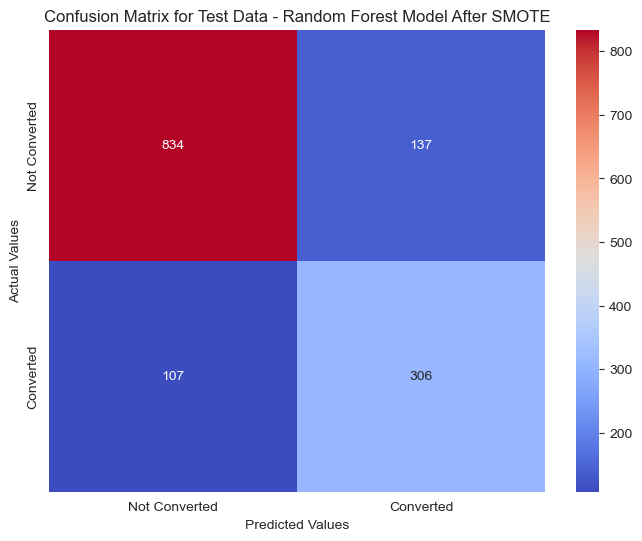

In [442]:
# Plot confusion matrix for test set
cm_test_rfc_smote = confusion_matrix(y_test, y_test_pred_rfc_smote)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test_rfc_smote, annot=True, fmt="d", cmap='coolwarm',
            xticklabels=['Not Converted', 'Converted'],
            yticklabels=['Not Converted', 'Converted'])
plt.title('Confusion Matrix for Test Data - Random Forest Model After SMOTE')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.savefig('images/conf_matrix_test_dec_tree_SMOTE.png',  dpi=300)
plt.show()

#### Random Forest With SMOTE Summary:
- **Training accuracy:** 99.94%, indicative of overfitting.
- **Test accuracy:**  82.37%, lower compared to the model without SMOTE.
- **Precision and Recall:** Slightly reduced precision and increased recall for converted leads.

**Conclusion:**
- The application of SMOTE leads to overfittingand, as evidenced by high training accuracy and reduced test performance. Suggesting hyperparameter tuning of the Random Forest without SMOTE to address overfitting and enhance generalization.

### Step 7.3: Random Forest With Hyperparameter Tuning
Let's proceeding with hyperparameter tuning for the Random Forest model.  We'll aim to enhance the model's performance, focusing on balancing accuracy, precision, recall, and reducing overfitting.

In [458]:
# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

In [459]:
# Create a base model
rf = RandomForestClassifier(random_state=1)

In [460]:
# Instantiate the Grid Search model to find optimal value of e-estimators
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

In [461]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=2)

In [462]:
# Print the best parameters found
print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}


In [463]:
# Use the best estimator to make predictions
best_rf = grid_search.best_estimator_

In [464]:
# Predict on the training set
y_train_pred_best_rf = best_rf.predict(X_train)

In [465]:
# Evaluate training model
print("Training Set Evaluation - Tuned Random Forest:")
print(classification_report(y_train, y_train_pred_best_rf))
print("Accuracy Score:", accuracy_score(y_train, y_train_pred_best_rf))

Training Set Evaluation - Tuned Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2264
           1       0.86      0.83      0.84       964

    accuracy                           0.91      3228
   macro avg       0.90      0.89      0.89      3228
weighted avg       0.91      0.91      0.91      3228

Accuracy Score: 0.9092317224287485


In [467]:
# Predict on the test set
y_test_pred_best_rf = best_rf.predict(X_test)

In [469]:
# Evaluate on test data
print("Test Set Evaluation - Tuned Random Forest:")
print(classification_report(y_test, y_test_pred_best_rf))
print("Accuracy Score:", accuracy_score(y_test, y_test_pred_best_rf))

Test Set Evaluation - Tuned Random Forest:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       971
           1       0.80      0.74      0.77       413

    accuracy                           0.87      1384
   macro avg       0.85      0.83      0.84      1384
weighted avg       0.87      0.87      0.87      1384

Accuracy Score: 0.8670520231213873


In [57]:
# # Install librarie for decidion tree visualization 
# %conda install python-graphviz -y 
# Draw graph = pydotplus.graph_from_data("your_model")
# #Show graph 
# Image(graph.create_png())
# # Save graph
# file_path = ("../Test_assesment/decidion_tree_graph.png")
# graph.write_png(file_path)

In [58]:
# Explore Grid Search optimization function for Random forest to c
# Set random state for replicating the same results of the model in the future

In [ ]:
# # Calculate feature importance 
# importance = your_rf_model.feature_importances_

In [60]:
# # Zip the feature importances with the assosiated feature name
# important_features = zip(X.columns,your_rf_model.feature_importances_)
# important_features

In [ ]:
# # Create a dataframe of the important features
# importances_df = pd.DataFrame(important_features)

# # Rename the columns 
# importances_df = importances_df.rename(columns={0: 'Feature', 1: 'Importance'})

# # Set index 
# importances_df = importances_df.set_index('Feature')

# # Sort the dataframe by feature importance
# importances_df = importances_df.sort_values(by='Importance', ascending=False)

In [ ]:
# # Plot the top 10 most important features
# importances_df[0:10].plot(
#     kind='brah',
#     color='lightgreen',
#     title='Feature Importance',
#     legend=True)


In [ ]:
# # Get count on inportant features
# importances_df.head()

In [87]:
# # Confusio matrix
# TN = matrix[0,0]
# FP = matrix[0,1]
# FN = matrix[1,0]
# TP = matrix[1,1]
# Specificity =  round(TN / (FP + TN), 4) # True Negative Rate 
# FPR  = round(FP / (FP + TN), 4)
# Confidence = round(1 - FPR, 4)
# Precision = TP / (FP + TP)
# Recall_Power = round(TP / (TP + FN), 4) #Sensitivity or TPR
# G_mean = (Specificity * Recall_Power) **(1/2) 
# Accuracy = round((TP + TN) / (TP +FP + TN + FN), 4)
# f1_score = 2 * (Precision * Recall_Power) / (Precision + Recall_Power)

## Building a Decision Tree model

## Building a Random Forest model

## Do we need to prune the tree?

## Actionable Insights and Recommendations